## Exploring Renovation Potentials: Data-Driven Insights for Renovation Service Providers in Chemnitz

Matrnr.: 8161859, 

### .-1 Setup requirements

- Python version 3.9.18

In [105]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### 0. Preprocessing

1. Read the datafile into the notebook
2. Extract columns
3. Use only rows with "Chemnitz"
4. Save the dataset into a new file.

In [106]:
import pandas as pd

In [107]:
raw_immo_data = pd.read_csv('./immo_data.csv')

Notes:
- The dataset contains different datatypes but also using whitespraces with "_" but also common whitespaces.
- There are many values with NaN
- Some datafields say NO_Information which is probably similar to NaN?

In [108]:
def extractColumnsFromDataset(dataset):
    filtered = dataset[['regio1', 'newlyConst', 'balcony', 'totalRent', 'yearConstructed', 'hasKitchen', 'baseRent', 'livingSpace', 'condition', 'interiorQual', 'petsAllowed','noRooms', 'thermalChar', 'regio2', 'regio3', 'lastRefurbish', 'date']]
    return filtered

extracted_immo_data = extractColumnsFromDataset(raw_immo_data)
extracted_immo_data.shape

(268850, 17)

In [109]:
def filterRegioForChemnitz(datset):
    chemnitz_rows = datset[datset['regio2'] == 'Chemnitz']
    return chemnitz_rows

chemnitz_rows = filterRegioForChemnitz(extracted_immo_data)
chemnitz_rows.shape

(12575, 17)

In [110]:
def saveToCsv(dataset):
    dataset.to_csv('outData.csv', sep="\t", index=False)

saveToCsv(chemnitz_rows)

In [111]:
chemnitz_in = pd.read_csv('./outData.csv', delimiter="\t")
chemnitz_in.shape
chemnitz_in

,regio1,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,petsAllowed,noRooms,thermalChar,regio2,regio3,lastRefurbish,date
0,Sachsen,False,True,307.00,1930.0,False,219.00,40.20,NaN,normal,NaN,2.0,123.0,Chemnitz,Sonnenberg,NaN,Oct19
1,Sachsen,False,True,501.00,NaN,False,340.00,65.00,fully_renovated,normal,yes,3.0,NaN,Chemnitz,Lutherviertel,NaN,Oct19
2,Sachsen,False,True,425.00,1909.0,True,280.00,53.12,well_kept,normal,negotiable,2.0,153.0,Chemnitz,Bernsdorf,2014.0,Feb20
3,Sachsen,False,True,760.00,1998.0,True,560.00,115.00,NaN,NaN,NaN,5.0,NaN,Chemnitz,Sonnenberg,2000.0,Oct19
4,Sachsen,False,False,715.00,1920.0,False,515.00,102.30,well_kept,NaN,NaN,3.0,NaN,Chemnitz,Zentrum,1995.0,Oct19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,Sachsen,False,False,293.00,1895.0,False,198.00,43.00,NaN,normal,NaN,2.0,96.0,Chemnitz,Kappel,NaN,Feb20
12571,Sachsen,False,True,444.00,NaN,False,314.00,59.00,fully_renovated,sophisticated,negotiable,2.0,NaN,Chemnitz,Schloßchemnitz,NaN,May19
12572,Sachsen,True,True,799.88,2018.0,False,611.88,91.13,refurbished,sophisticated,negotiable,3.0,NaN,Chemnitz,Gablenz,2018.0,May19
12573,Sachsen,False,True,326.00,NaN,False,222.00,47.34,fully_renovated,normal,negotiable,1.0,NaN,Chemnitz,Kaßberg,NaN,May19


### 1. Business Understanding

Wir sind eine Renovierungsfirma die weiter im Raum Chemnitz expandieren möchte. Momentan sind wir auf Renovierungen im Innenbereich spezialisiert. Um einen größeren Leistungsumfang anzubieten und mehr Umsatz zu generieren steht die Frage im Raum, ob eine zusätzliche Spezialisierung auf Renovierungen im Außenbereich sinnvoll ist.

Erfahrungsgemäß: 
- Umfassende Sanierungen (80.000 €) sind bei Wohnungen älter als 40 Jahre nötig 
- Kleine Sanierungen (15.000 €) seit Renovierungsarbeit länger als 10 Jahre her

Frage:
- Mit wieviel zusätzlichem Umsatz kann gerechnet werden?

Daher unsere Kernfragen:
1. Lohnt es Experte für Renovierungen im Außenbereich zu werden?
- Sind Wohnungen mit Balkon teuer (total rent) und sind diese über 40 jahre alt und nicht vor 10 Jahren renoviert
- Ist in nächsten fünf Jahren mit großen Renovierungsarbeiten im Außenbereich zu rechnen? Vergleichen von Wohnungen nur mit Innenbereich

Beispielhafte Antwort:
- Von 12.000 Wohnungen benötigen in den nächsten fünf Jahren 5 Prozent umfassende Renovierungen und 15 Prozent kleinere Sanierungen. Lediglich 1 Prozent der umfassenden Renovierungen haben einen Balkon und nur 3 Prozent der kleinen. Generell haben Wohnungen mit Außenbereich 30 Prozent höhere Mieten.
- Es macht daher keinen Sinn umfassende Investitionen in den Außenbereich zu tätigen 

Data Understanding:
- Welche Daten liegen vor?
- Wie sehen diese aus? Könnte es Probleme mit den Daten geben?
- Kann man »auf den ersten Blick« bereits Zusammenhänge erkennen?
- Wie könnten beispielhafte Antworten oder Ergebnisse aussehen?

Data Preperation:
- Können die Daten in der vorliegenden Form
verwendet werden? (meistens: nein)
- Wie können diese vorverarbeitet werden, um sie zu verwenden?

Modelling:
- Welche Verfahren lösen mein Problem?
- Wie kann man die Verfahren verbessern?
- Welche Alternativen gibt es?
- Achtung: Es gibt unter Umständen einen (sehr starken) Zusammenhang mit Data Preparation -> Iterationszyklen

Evaluation:
- Welches Verfahren ist am Besten?
- Beantwortet es die Fragen aus dem Geschäftsverstehen?

Deployment:
- Wie können die Ergebnisse präsentiert
werden?
- Wie können die Ergebnisse integriert werden?

### 2. Data Exploration und Analyse

#### Erste Analyse und Betrachtung

In [112]:
# Header der Daten
chemnitz_in.columns

Index(['regio1', 'newlyConst', 'balcony', 'totalRent', 'yearConstructed',
       'hasKitchen', 'baseRent', 'livingSpace', 'condition', 'interiorQual',
       'petsAllowed', 'noRooms', 'thermalChar', 'regio2', 'regio3',
       'lastRefurbish', 'date'],
      dtype='object')

In [113]:
# Größe der Datentabelle
chemnitz_in.shape

(12575, 17)

In [114]:
# Übersicht über die Daten und deren Datentypen
chemnitz_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   regio1           12575 non-null  object 
 1   newlyConst       12575 non-null  bool   
 2   balcony          12575 non-null  bool   
 3   totalRent        11388 non-null  float64
 4   yearConstructed  8811 non-null   float64
 5   hasKitchen       12575 non-null  bool   
 6   baseRent         12575 non-null  float64
 7   livingSpace      12575 non-null  float64
 8   condition        9805 non-null   object 
 9   interiorQual     7079 non-null   object 
 10  petsAllowed      8302 non-null   object 
 11  noRooms          12575 non-null  float64
 12  thermalChar      8351 non-null   float64
 13  regio2           12575 non-null  object 
 14  regio3           12575 non-null  object 
 15  lastRefurbish    2826 non-null   float64
 16  date             12575 non-null  object 
dtypes: bool(3), 

In [115]:
# Stichprobe 60-sten Datensatz aus der Liste
chemnitz_in.iloc[60]
# Beispielsweise sind in dieser Stichprobe einige Werte nicht sinnvoll:
# - lastRefurbish hat einen NaN-Wert
# - Date ist kein sinvoll verwendbares Datum
# - yearConstructed ist in Datentyp Float

regio1                    Sachsen
newlyConst                  False
balcony                     False
totalRent                   313.8
yearConstructed            1996.0
hasKitchen                   True
baseRent                    209.2
livingSpace                 46.49
condition               well_kept
interiorQual               normal
petsAllowed            negotiable
noRooms                       1.0
thermalChar                  82.8
regio2                   Chemnitz
regio3             Schloßchemnitz
lastRefurbish                 NaN
date                        Sep18
Name: 60, dtype: object

In [116]:
chemnitz_in[['regio1', "totalRent"]]

,regio1,totalRent
0,Sachsen,307.00
1,Sachsen,501.00
2,Sachsen,425.00
3,Sachsen,760.00
4,Sachsen,715.00
...,...,...
12570,Sachsen,293.00
12571,Sachsen,444.00
12572,Sachsen,799.88
12573,Sachsen,326.00


In [117]:
# Hier fällt auf, das Total Rent eine Range von 0.0 bis NaN hat.
chemnitz_in.sort_values('totalRent')

,regio1,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,petsAllowed,noRooms,thermalChar,regio2,regio3,lastRefurbish,date
6108,Sachsen,False,False,0.0,1910.0,True,0.0,62.00,well_kept,normal,negotiable,2.0,105.3,Chemnitz,Sonnenberg,1995.0,May19
10005,Sachsen,False,True,0.0,1925.0,False,275.0,54.20,NaN,NaN,NaN,2.0,116.3,Chemnitz,Sonnenberg,NaN,Sep18
6359,Sachsen,False,False,0.0,1900.0,False,230.0,41.10,NaN,NaN,NaN,2.0,NaN,Chemnitz,Bernsdorf,NaN,May19
4109,Sachsen,False,True,0.0,NaN,False,0.0,95.10,NaN,NaN,NaN,2.0,NaN,Chemnitz,Hutholz,NaN,Oct19
11463,Sachsen,False,True,1.0,NaN,False,459.0,70.60,first_time_use_after_refurbishment,sophisticated,negotiable,3.0,NaN,Chemnitz,Zentrum,2018.0,May19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12475,Sachsen,False,True,NaN,1900.0,False,335.0,67.00,well_kept,normal,NaN,2.0,110.8,Chemnitz,Lutherviertel,1996.0,Sep18
12507,Sachsen,False,False,NaN,1900.0,False,370.0,74.00,mint_condition,NaN,NaN,3.0,126.0,Chemnitz,Gablenz,1995.0,May19
12515,Sachsen,False,False,NaN,1915.0,False,243.0,52.80,fully_renovated,NaN,negotiable,2.0,102.0,Chemnitz,Siegmar,NaN,May19
12525,Sachsen,False,True,NaN,1985.0,False,256.0,51.15,refurbished,NaN,negotiable,2.0,65.0,Chemnitz,Reichenbrand,NaN,Feb20


In [118]:
# Describe ergibt hier wenig sinn, da die Tabelle noch nicht aufbereitet ist.
# Es ist aber klar, dass eine totalRent von 0 nicht sinnvoll ist
# Zudem ist unklar, was noRooms aussagt.
chemnitz_in.describe()

,totalRent,yearConstructed,baseRent,livingSpace,noRooms,thermalChar,lastRefurbish
count,11388.000000,8811.000000,12575.000000,12575.000000,12575.000000,8351.000000,2826.000000
mean,458.504498,1935.814323,325.567874,62.503412,2.496619,104.832891,2007.629866
std,190.452234,35.971830,149.273900,25.842287,8.936825,57.348972,10.050789
min,0.000000,1862.000000,0.000000,0.000000,1.000000,18.000000,1900.000000
25%,350.000000,1908.000000,245.000000,49.560000,2.000000,84.380000,1998.000000
50%,420.000000,1920.000000,295.000000,59.030000,2.000000,100.000000,2010.000000
75%,500.000000,1968.000000,357.000000,70.000000,3.000000,117.365000,2018.000000
max,2536.000000,2020.000000,2072.000000,1717.740000,999.990000,1983.000000,2021.000000


In [119]:
# Alle Zeilen mit NaNs löschen:
chemnitz_in.dropna(axis = 0)
# Nur 955 Zeilen besitzen keine NaN Werte

,regio1,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,petsAllowed,noRooms,thermalChar,regio2,regio3,lastRefurbish,date
2,Sachsen,False,True,425.0,1909.0,True,280.0,53.12,well_kept,normal,negotiable,2.0,153.00,Chemnitz,Bernsdorf,2014.0,Feb20
26,Sachsen,False,True,315.0,1961.0,False,225.0,45.28,refurbished,normal,negotiable,2.0,64.00,Chemnitz,Sonnenberg,1997.0,Sep18
36,Sachsen,False,True,498.0,1910.0,False,350.0,74.00,refurbished,normal,negotiable,3.0,142.00,Chemnitz,Hilbersdorf,1998.0,Feb20
43,Sachsen,False,True,1340.0,2015.0,False,1050.0,146.00,first_time_use_after_refurbishment,sophisticated,negotiable,4.0,120.10,Chemnitz,Siegmar,2015.0,Feb20
56,Sachsen,False,True,364.0,1930.0,False,250.0,47.30,refurbished,sophisticated,negotiable,2.0,114.40,Chemnitz,Gablenz,2007.0,May19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12519,Sachsen,False,True,530.0,1920.0,True,380.0,72.00,mint_condition,sophisticated,negotiable,3.0,78.00,Chemnitz,Hilbersdorf,1998.0,Sep18
12524,Sachsen,False,False,499.0,1904.0,False,365.0,77.00,first_time_use_after_refurbishment,sophisticated,negotiable,5.0,69.00,Chemnitz,Hilbersdorf,2018.0,Sep18
12544,Sachsen,False,False,574.0,1900.0,True,399.0,74.59,well_kept,sophisticated,negotiable,3.0,113.83,Chemnitz,Schloßchemnitz,2013.0,May19
12556,Sachsen,False,True,515.0,1900.0,True,350.0,65.97,well_kept,sophisticated,negotiable,3.0,113.83,Chemnitz,Schloßchemnitz,1992.0,Feb20


In [120]:
# Alle Spalten mit NaNs löschen:
chemnitz_in.dropna(axis = 1)
# 10 Spalten besitzen keine NaN Werte, aber 7 schon

,regio1,newlyConst,balcony,hasKitchen,baseRent,livingSpace,noRooms,regio2,regio3,date
0,Sachsen,False,True,False,219.00,40.20,2.0,Chemnitz,Sonnenberg,Oct19
1,Sachsen,False,True,False,340.00,65.00,3.0,Chemnitz,Lutherviertel,Oct19
2,Sachsen,False,True,True,280.00,53.12,2.0,Chemnitz,Bernsdorf,Feb20
3,Sachsen,False,True,True,560.00,115.00,5.0,Chemnitz,Sonnenberg,Oct19
4,Sachsen,False,False,False,515.00,102.30,3.0,Chemnitz,Zentrum,Oct19
...,...,...,...,...,...,...,...,...,...,...
12570,Sachsen,False,False,False,198.00,43.00,2.0,Chemnitz,Kappel,Feb20
12571,Sachsen,False,True,False,314.00,59.00,2.0,Chemnitz,Schloßchemnitz,May19
12572,Sachsen,True,True,False,611.88,91.13,3.0,Chemnitz,Gablenz,May19
12573,Sachsen,False,True,False,222.00,47.34,1.0,Chemnitz,Kaßberg,May19


#### Erste Erkenntnisse

- Datensatz hat 12575 Einträge mit 17 Spalten davon
- besitzen 10 Spalten besitzen keine NaN Werte, aber 7 und
- nur 955 Zeilen besitzen keine NaN Werte.
- Zudem haben die Spalten teilweise "falsche" Datentypen

In [121]:
import matplotlib.pyplot as plt

#### Analyse der nicht numerischen Spalten

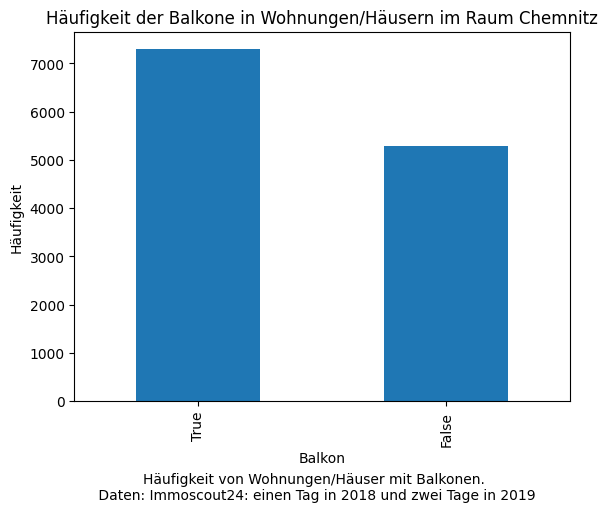

In [122]:
balcony = chemnitz_in['balcony'].value_counts()

balcony.plot(kind='bar')
plt.title('Häufigkeit der Balkone in Wohnungen/Häusern im Raum Chemnitz')
plt.xlabel('Balkon')
plt.ylabel('Häufigkeit')

plt.figtext(0.5, -0.1, 'Häufigkeit von Wohnungen/Häuser mit Balkonen.\n Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019', ha='center', va='bottom')
plt.show()

In [123]:
# Anteil der Wohnuungen/Häuser mit Balkonen
total_count = len(chemnitz_in)
balcony_count = chemnitz_in['balcony'].sum()
percentage_with_balcony = (balcony_count / total_count) * 100
print(f"Der Anteil von Wohnungen/Häusern mit Balkonen beträgt {percentage_with_balcony:.2f}%.")

Der Anteil von Wohnungen/Häusern mit Balkonen beträgt 57.99%.


#### Numerische Spalten

##### Boxplot

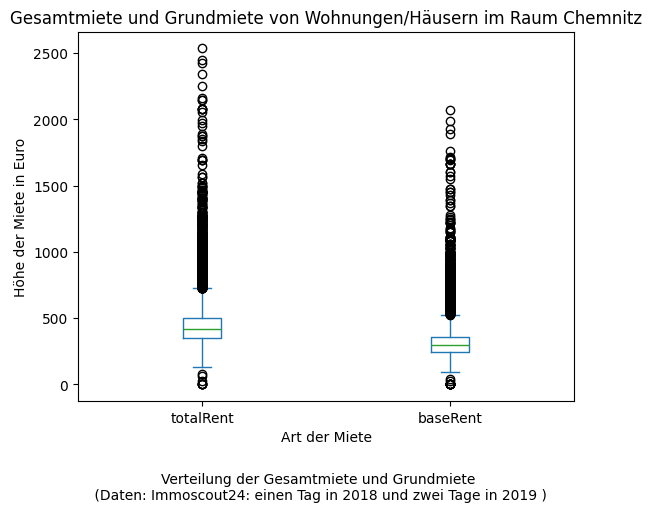

In [124]:
rent = ["totalRent", "baseRent"]

boxplot = chemnitz_in[rent].plot(kind="box")

plt.title('Gesamtmiete und Grundmiete von Wohnungen/Häusern im Raum Chemnitz')
plt.xlabel('Art der Miete')
plt.ylabel('Höhe der Miete in Euro')

plt.figtext(0.5, -0.1, 'Verteilung der Gesamtmiete und Grundmiete\n (Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019 )', ha='center', va='bottom')
plt.show()

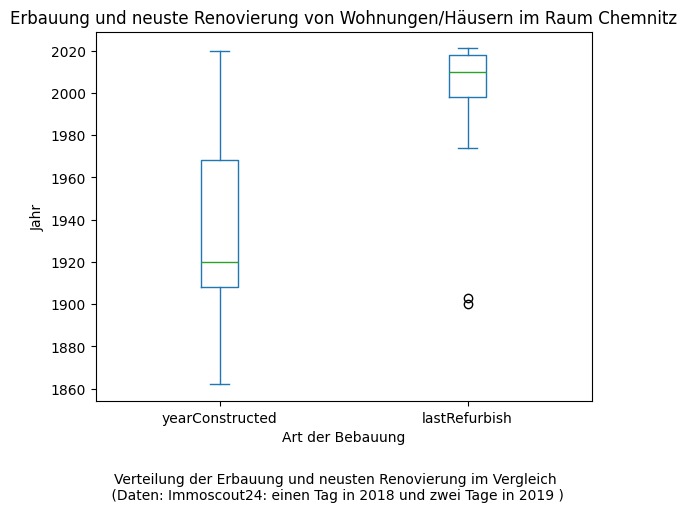

In [125]:
construction_site = ["yearConstructed", "lastRefurbish"]
chemnitz_in[construction_site].plot(kind="box")

plt.title('Erbauung und neuste Renovierung von Wohnungen/Häusern im Raum Chemnitz')
plt.xlabel('Art der Bebauung')
plt.ylabel('Jahr')

plt.figtext(0.5, -0.1, 'Verteilung der Erbauung und neusten Renovierung im Vergleich\n (Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019 )', ha='center', va='bottom')
plt.show()

In [126]:
quantile_25_construction_year = chemnitz_in["yearConstructed"].quantile(0.25)
quantile_75_construction_year = chemnitz_in["yearConstructed"].quantile(0.75)
quantile_25_last_refurbish = chemnitz_in["lastRefurbish"].quantile(0.25)
quantile_75_last_refurbish = chemnitz_in["lastRefurbish"].quantile(0.75)

print(f"Das 0,25-Quantil (Q1) des Baujahres beträgt: {quantile_25_construction_year}")
print(f"Das 0,75-Quantil (Q3) des Baujahres beträgt: {quantile_75_construction_year}")

print(f"Das 0,75-Quantil (Q3) der letzten Renovierung beträgt: {quantile_75_last_refurbish}")
print(f"Das 0,25-Quantil (Q1) der letzten Renovierung beträgt: {quantile_25_last_refurbish}")

Das 0,25-Quantil (Q1) des Baujahres beträgt: 1908.0
Das 0,75-Quantil (Q3) des Baujahres beträgt: 1968.0
Das 0,75-Quantil (Q3) der letzten Renovierung beträgt: 2018.0
Das 0,25-Quantil (Q1) der letzten Renovierung beträgt: 1998.0


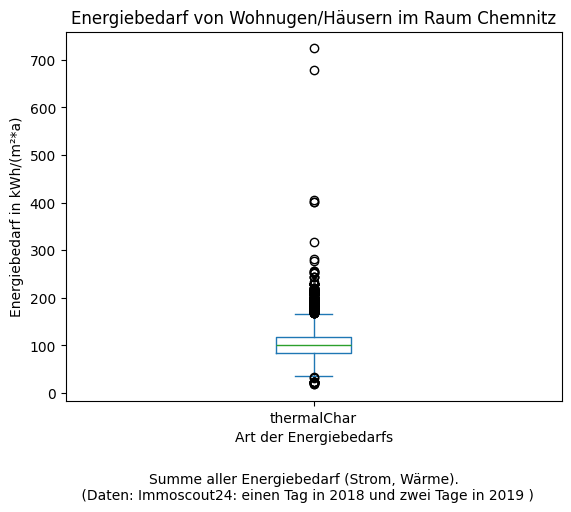

In [127]:
chemnitz_in = chemnitz_in[chemnitz_in['thermalChar'] <= 1000]
chemnitz_in["thermalChar"].plot(kind="box")

plt.title('Energiebedarf von Wohnugen/Häusern im Raum Chemnitz')
plt.xlabel('Art der Energiebedarfs')
plt.ylabel('Energiebedarf in kWh/(m²*a)')

plt.figtext(0.5, -0.1, 'Summe aller Energiebedarf (Strom, Wärme). \n (Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019 )', ha='center', va='bottom')
plt.show()

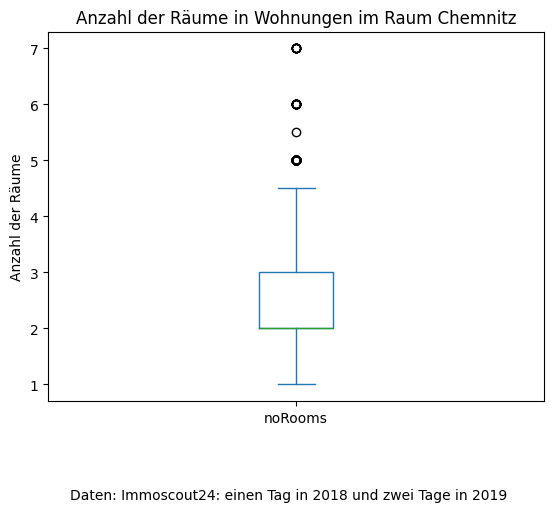

In [128]:
# Entfernen von Wohnugen/Häusern mit mehr als 100 Räumen.
# In der Regel haben Wohnungen/Häuser nicht mehr als 100 Räume
# Ausnahme ist beispielsweise das Schloss Schönbrunn mit 1.441 Räumen (Google)
chemnitz_in = chemnitz_in[chemnitz_in['noRooms'] <= 100]
chemnitz_in["noRooms"].plot(kind="box")

plt.title('Anzahl der Räume in Wohnungen im Raum Chemnitz')
plt.ylabel('Anzahl der Räume')

plt.figtext(0.5, -0.1, 'Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019', ha='center', va='bottom')
plt.show()

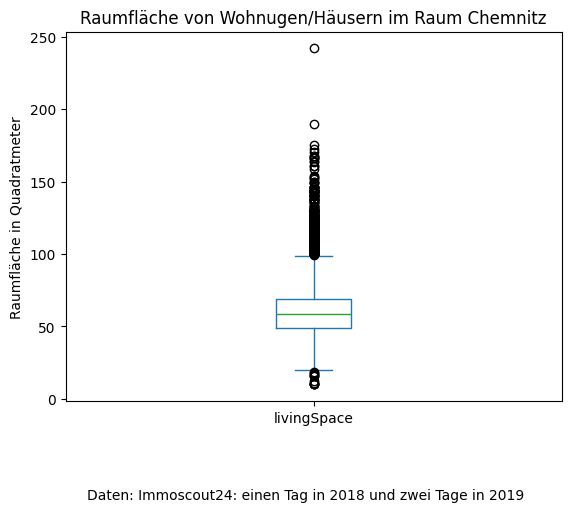

In [129]:
chemnitz_in = chemnitz_in[chemnitz_in['livingSpace'] <= 1000]
chemnitz_in["livingSpace"].plot(kind="box")

plt.title('Raumfläche von Wohnugen/Häusern im Raum Chemnitz')
plt.ylabel('Raumfläche in Quadratmeter')

plt.figtext(0.5, -0.1, 'Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019', ha='center', va='bottom')
plt.show()

##### Histogramme

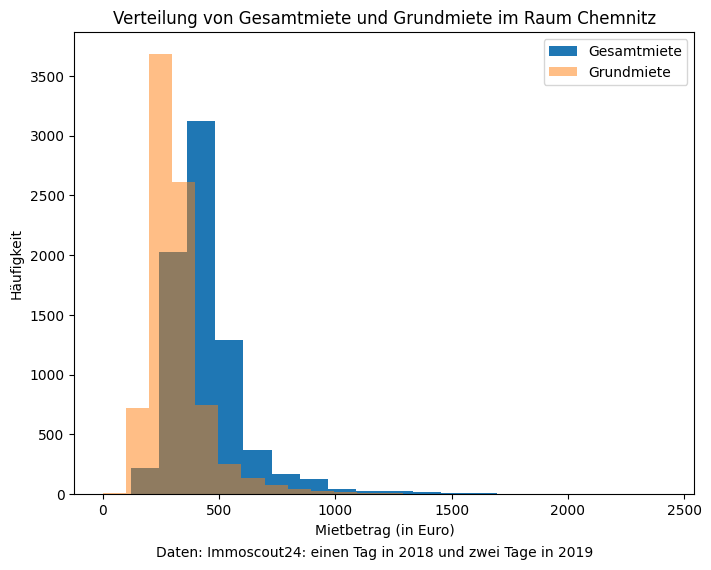

In [130]:
plt.figure(figsize=(8, 6))

plt.hist(chemnitz_in["totalRent"], bins=20, label='Gesamtmiete')

plt.hist(chemnitz_in["baseRent"], bins=20, alpha=0.5, label='Grundmiete')

plt.title('Verteilung von Gesamtmiete und Grundmiete im Raum Chemnitz')
plt.xlabel('Mietbetrag (in Euro)')
plt.ylabel('Häufigkeit')
plt.legend()
plt.figtext(0.5, 0, 'Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019', ha='center', va='bottom')

plt.show()

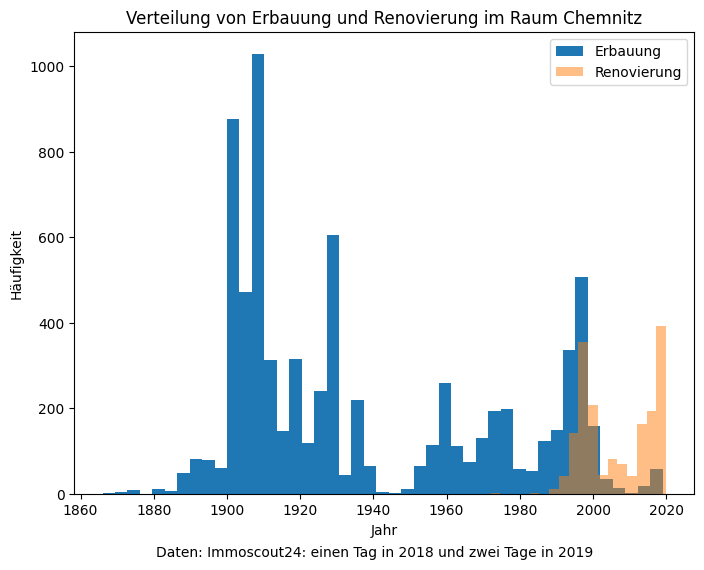

In [131]:
plt.figure(figsize=(8, 6))

plt.hist(chemnitz_in["yearConstructed"], bins=45, label='Erbauung')

plt.hist(chemnitz_in["lastRefurbish"], bins=45, alpha=0.5, label='Renovierung')

plt.title('Verteilung von Erbauung und Renovierung im Raum Chemnitz')
plt.xlabel('Jahr')
plt.ylabel('Häufigkeit')
plt.legend()
plt.figtext(0.5, 0, 'Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019', ha='center', va='bottom')

plt.show()

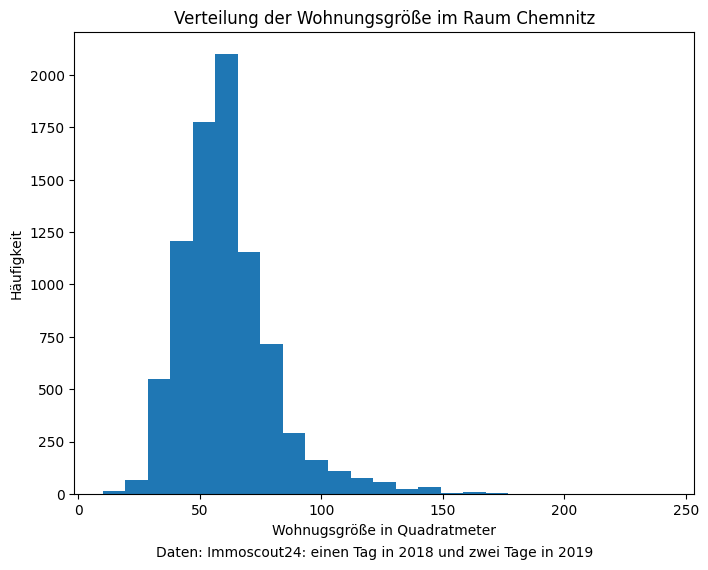

In [132]:
plt.figure(figsize=(8, 6))

plt.hist(chemnitz_in["livingSpace"], bins=25)

plt.title('Verteilung der Wohnungsgröße im Raum Chemnitz')
plt.xlabel('Wohnugsgröße in Quadratmeter')
plt.ylabel('Häufigkeit')
plt.figtext(0.5, 0, 'Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019', ha='center', va='bottom')

plt.show()

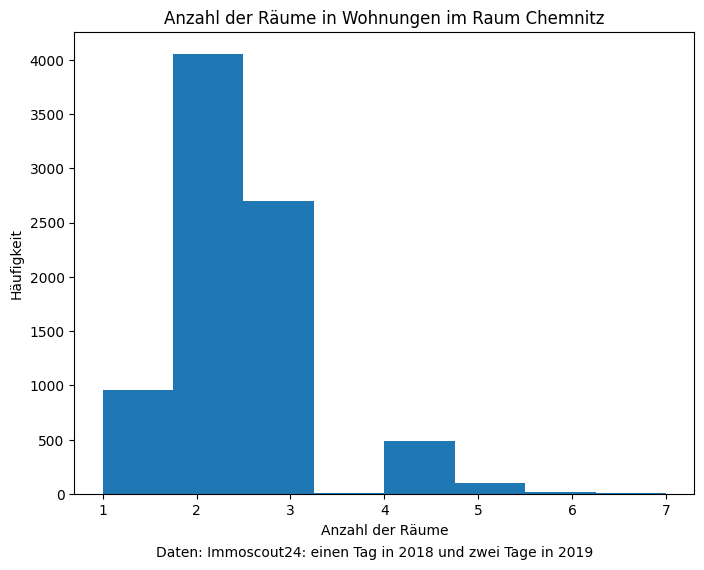

In [133]:
plt.figure(figsize=(8, 6))

plt.hist(chemnitz_in["noRooms"], bins=8)

plt.title('Anzahl der Räume in Wohnungen im Raum Chemnitz')
plt.xlabel('Anzahl der Räume')
plt.ylabel('Häufigkeit')
plt.figtext(0.5, 0, 'Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019', ha='center', va='bottom')

plt.show()

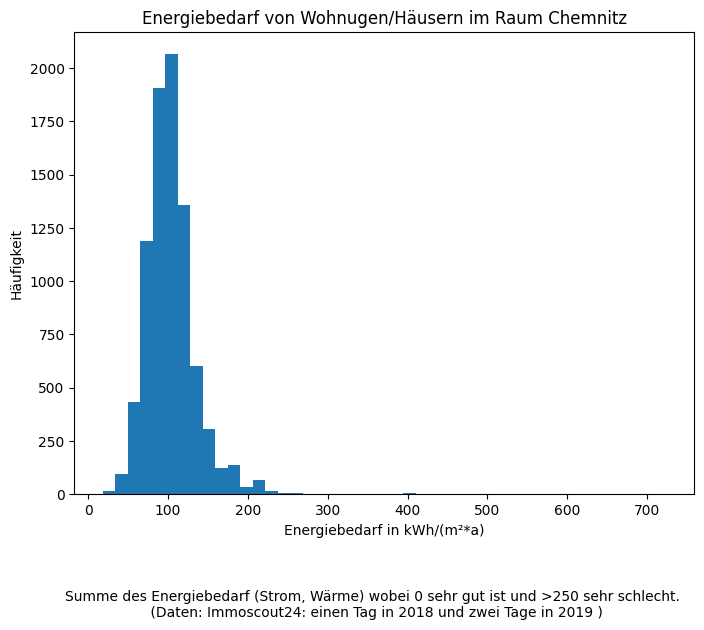

In [134]:
plt.figure(figsize=(8, 6))

plt.hist(chemnitz_in["thermalChar"], bins=45)

plt.title('Energiebedarf von Wohnugen/Häusern im Raum Chemnitz')
plt.xlabel('Energiebedarf in kWh/(m²*a)')
plt.ylabel('Häufigkeit')
plt.figtext(0.5, -0.1, 'Summe des Energiebedarf (Strom, Wärme) wobei 0 sehr gut ist und >250 sehr schlecht. \n (Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019 )', ha='center', va='bottom')
plt.show()

##### Scatter

array([[<Axes: xlabel='totalRent', ylabel='totalRent'>,
        <Axes: xlabel='yearConstructed', ylabel='totalRent'>,
        <Axes: xlabel='baseRent', ylabel='totalRent'>,
        <Axes: xlabel='livingSpace', ylabel='totalRent'>,
        <Axes: xlabel='noRooms', ylabel='totalRent'>,
        <Axes: xlabel='thermalChar', ylabel='totalRent'>,
        <Axes: xlabel='lastRefurbish', ylabel='totalRent'>],
       [<Axes: xlabel='totalRent', ylabel='yearConstructed'>,
        <Axes: xlabel='yearConstructed', ylabel='yearConstructed'>,
        <Axes: xlabel='baseRent', ylabel='yearConstructed'>,
        <Axes: xlabel='livingSpace', ylabel='yearConstructed'>,
        <Axes: xlabel='noRooms', ylabel='yearConstructed'>,
        <Axes: xlabel='thermalChar', ylabel='yearConstructed'>,
        <Axes: xlabel='lastRefurbish', ylabel='yearConstructed'>],
       [<Axes: xlabel='totalRent', ylabel='baseRent'>,
        <Axes: xlabel='yearConstructed', ylabel='baseRent'>,
        <Axes: xlabel='baseRent', 

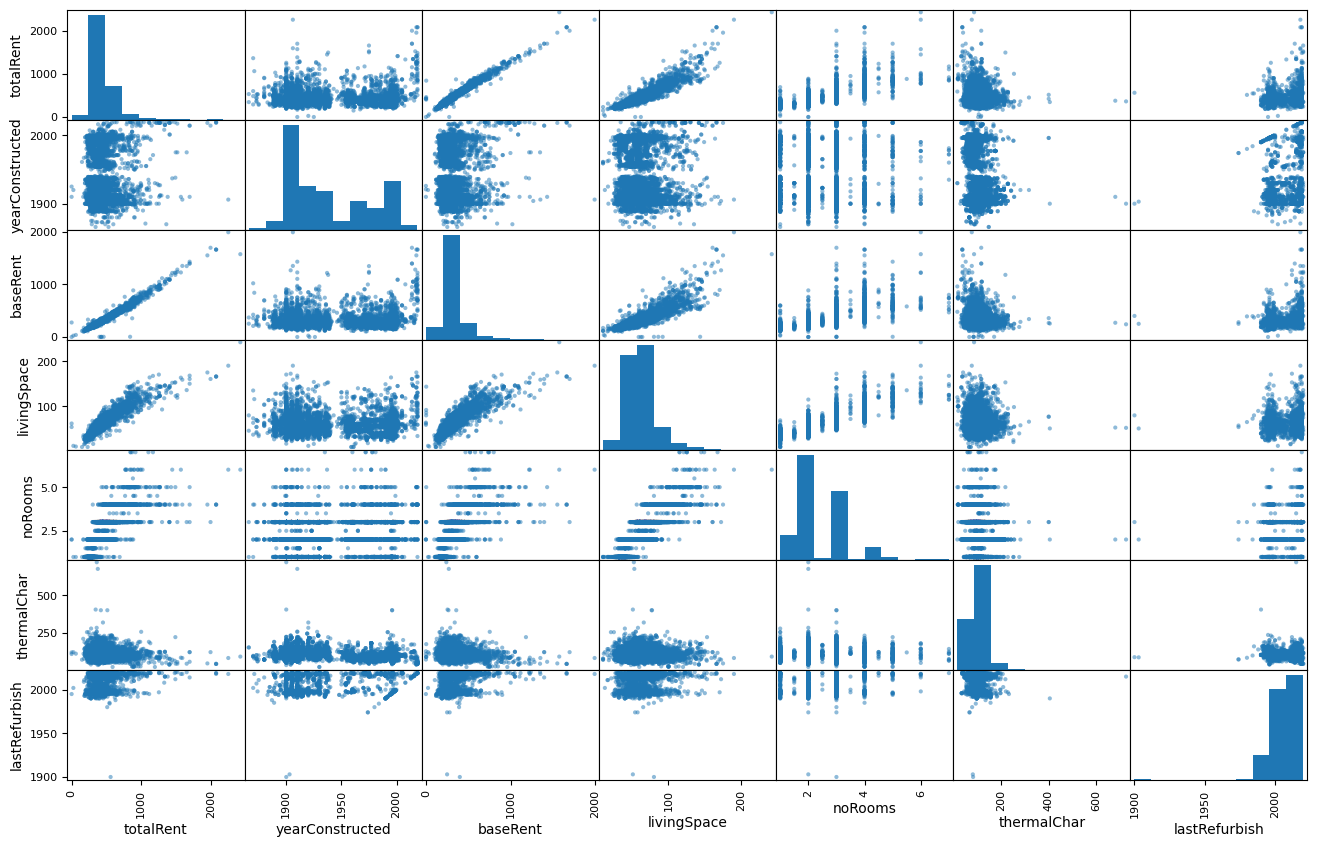

In [135]:
columnsWithNumbers = ['totalRent', 'yearConstructed', 'baseRent', 'livingSpace', 'noRooms', 'thermalChar', 'lastRefurbish']
pd.plotting.scatter_matrix(chemnitz_in[columnsWithNumbers], figsize=(16,10))

##### Heatmap

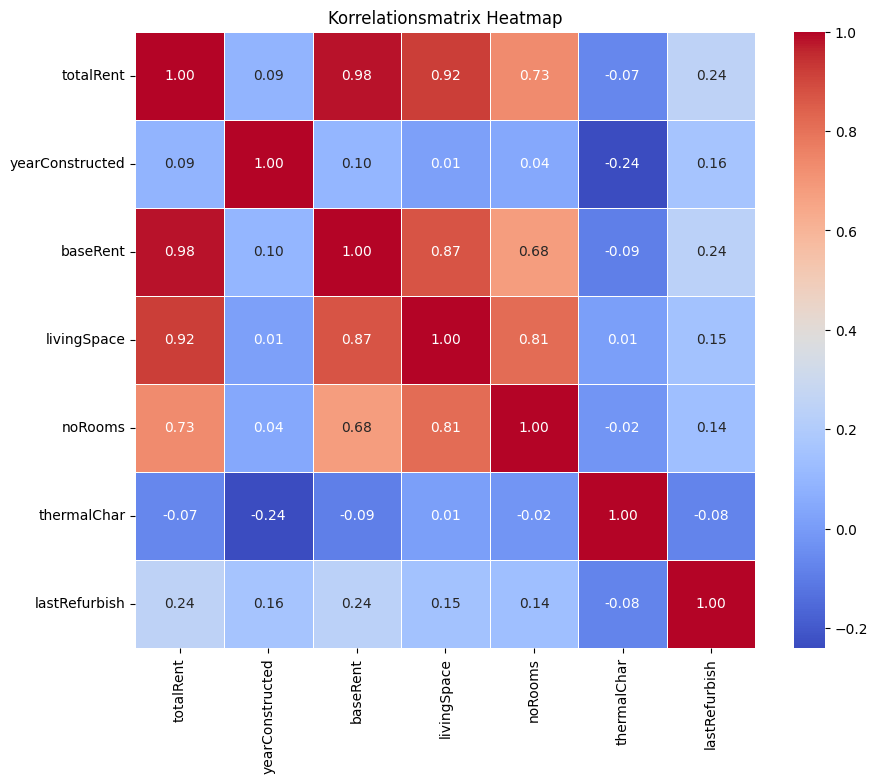

In [136]:
import seaborn as sns

In [ ]:
correlation_matrix = chemnitz_in[columnsWithNumbers].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korrelationsmatrix Heatmap')
plt.show()

#### Erkenntnisse Data Exploration

Entfernen von Wohnugen/Häusern:
- mit mehr als 100 Räumen
- mehr als 1000 qm

Aufällig:
- Ausreißer bei Anzahl an Räumen und Wohnfläche was evtl. ein Schloss ist.
- 50 % der Wohnungen/Häuser haben 2 oder 3 Räume
- 57.5 % der Wohnungen/Häuser haben einen Balkon
- 50 % der Wohnungen/Häuser wurden zwischen 1910 und 1972 erbaut
- 50 % der Wohnungen/Häuser wurden zwischen 1998 und 2017 renoviert
- Total Rent und Base Rent korreliert gut mit living Space und Anzahl der Räume
